In [97]:
import pandas as pd

In [98]:
train = pd.read_csv('03_santander_train_1.csv', index_col='ID')

In [99]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [100]:
y = list(train['TARGET'])

In [101]:
train = train.drop('TARGET', axis=1)

In [102]:
train.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38010 entries, 1 to 76042
Data columns (total 369 columns):
var3                             38010 non-null int64
var15                            38010 non-null int64
imp_ent_var16_ult1               38010 non-null float64
imp_op_var39_comer_ult1          38010 non-null float64
imp_op_var39_comer_ult3          38010 non-null float64
imp_op_var40_comer_ult1          38010 non-null float64
imp_op_var40_comer_ult3          38010 non-null float64
imp_op_var40_efect_ult1          38010 non-null float64
imp_op_var40_efect_ult3          38010 non-null float64
imp_op_var40_ult1                38010 non-null float64
imp_op_var41_comer_ult1          38010 non-null float64
imp_op_var41_comer_ult3          38010 non-null float64
imp_op_var41_efect_ult1          38010 non-null float64
imp_op_var41_efect_ult3          38010 non-null float64
imp_op_var41_ult1                38010 non-null float64
imp_op_var39_efect_ult1          38010 non-null float6

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [120]:
# Работаем с деревом решением
from sklearn.tree import DecisionTreeClassifier

In [121]:
dtc1 = DecisionTreeClassifier(max_depth=5)
dtc1.fit(X_train, y_train)

dtc2 = DecisionTreeClassifier(max_depth=10)
dtc2.fit(X_train, y_train)

dtc3 = DecisionTreeClassifier(max_depth=20)
dtc3.fit(X_train, y_train)

dtc4 = DecisionTreeClassifier(max_depth=30)
dtc4.fit(X_train, y_train)

dtc5 = DecisionTreeClassifier(max_depth=50)
dtc5.fit(X_train, y_train)

dtc01 = DecisionTreeClassifier(max_depth=2)
dtc01.fit(X_train, y_train)

dtc02 = DecisionTreeClassifier(max_depth=3)
dtc02.fit(X_train, y_train)

dtc03 = DecisionTreeClassifier(max_depth=4)
dtc03.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
from sklearn.metrics import roc_auc_score

In [123]:
p1 = roc_auc_score(y_test, dtc1.predict_proba(X_test)[:,1])
p2= roc_auc_score(y_test, dtc2.predict_proba(X_test)[:,1])
p3 = roc_auc_score(y_test, dtc3.predict_proba(X_test)[:,1])
p4 = roc_auc_score(y_test, dtc4.predict_proba(X_test)[:,1])
p5 = roc_auc_score(y_test, dtc5.predict_proba(X_test)[:,1])
p01 = roc_auc_score(y_test, dtc01.predict_proba(X_test)[:,1])
p02 = roc_auc_score(y_test, dtc02.predict_proba(X_test)[:,1])
p03 = roc_auc_score(y_test, dtc03.predict_proba(X_test)[:,1])

In [124]:
max_depth = [2, 3, 4, 5, 10, 20, 30, 50]
p = [p01, p02, p03, p1, p2, p3, p4, p5]

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(max_depth, p)
plt.title("Зависимость roc_auc от max глубины дерева")

Text(0.5,1,'Зависимость roc_auc от max глубины дерева')

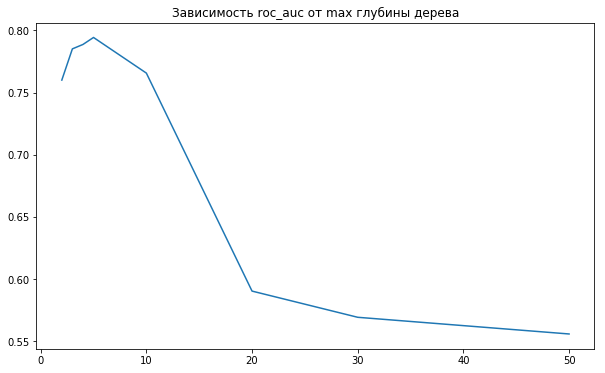

In [126]:
plt.show()

In [127]:
# Работаем с методом ближ. соседей
from sklearn.neighbors import KNeighborsClassifier

In [128]:
#Cократим число фич, чтобы не было проблем с памятью
useful_cols = ['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 
               'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'saldo_medio_var29_ult3',
               'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1'
              ]
train_urez = train[useful_cols]

In [134]:
train_urez.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38010 entries, 1 to 76042
Data columns (total 10 columns):
var3                       38010 non-null int64
var15                      38010 non-null int64
imp_ent_var16_ult1         38010 non-null float64
imp_op_var39_comer_ult1    38010 non-null float64
imp_op_var39_comer_ult3    38010 non-null float64
imp_op_var40_comer_ult1    38010 non-null float64
saldo_medio_var29_ult3     38010 non-null float64
saldo_medio_var33_hace2    38010 non-null float64
saldo_medio_var33_hace3    38010 non-null float64
saldo_medio_var33_ult1     38010 non-null float64
dtypes: float64(8), int64(2)
memory usage: 3.2 MB


In [135]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(train_urez, y, test_size=0.33, random_state=42)

In [136]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train0, y_train0)

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train0, y_train0)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train0, y_train0)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train0, y_train0)

knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train0, y_train0)

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train0, y_train0)

knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train0, y_train0)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [137]:
k1 = roc_auc_score(y_test0, knn1.predict_proba(X_test0)[:,1])
k2 = roc_auc_score(y_test0, knn2.predict_proba(X_test0)[:,1])
k3 = roc_auc_score(y_test0, knn3.predict_proba(X_test0)[:,1])
k5 = roc_auc_score(y_test0, knn5.predict_proba(X_test0)[:,1])
k7 = roc_auc_score(y_test0, knn7.predict_proba(X_test0)[:,1])
k10 = roc_auc_score(y_test0, knn10.predict_proba(X_test0)[:,1])
k15 = roc_auc_score(y_test0, knn15.predict_proba(X_test0)[:,1])

In [80]:
k25 = roc_auc_score(y_test0, knn15.predict_proba(X_test0)[:,1])

In [139]:
neigbors = [1, 2, 3, 5, 7, 10, 15, 25]
k = [k1, k2, k3, k5, k7, k10, k15, k25]

In [140]:
plt.figure(figsize=(10,6))
plt.plot(neigbors, k)
plt.title("Зависимость roc_auc от числа рассматриваемых соседей")

Text(0.5,1,'Зависимость roc_auc от числа рассматриваемых соседей')

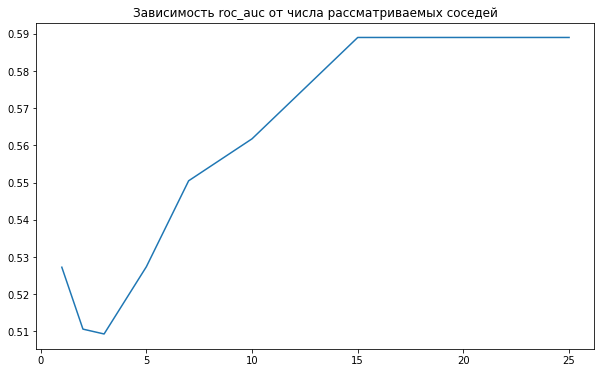

In [141]:
plt.show()

In [236]:
# Работаем с логистической регрессией
from sklearn.linear_model import LogisticRegression

In [237]:
lr11 = LogisticRegression(C=0.1, penalty='l1')
lr12 = LogisticRegression(C=0.1, penalty='l2')
lr21 = LogisticRegression(C=1, penalty='l1')
lr22 = LogisticRegression(C=1, penalty='l2')
lr31 = LogisticRegression(C=10, penalty='l1')
lr32 = LogisticRegression(C=10, penalty='l2')
lr41 = LogisticRegression(C=100, penalty='l1')
lr42 = LogisticRegression(C=100, penalty='l2')

In [238]:
lr11.fit(X_train, y_train)
lr12.fit(X_train, y_train)
lr21.fit(X_train, y_train)
lr22.fit(X_train, y_train)
lr31.fit(X_train, y_train)
lr32.fit(X_train, y_train)
lr41.fit(X_train, y_train)
lr42.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
lr11 = roc_auc_score(y_test, lr11.predict_proba(X_test)[:,1])
lr12 = roc_auc_score(y_test, lr12.predict_proba(X_test)[:,1])
lr21 = roc_auc_score(y_test, lr21.predict_proba(X_test)[:,1])
lr22 = roc_auc_score(y_test, lr22.predict_proba(X_test)[:,1])
lr31 = roc_auc_score(y_test, lr31.predict_proba(X_test)[:,1])
lr32 = roc_auc_score(y_test, lr32.predict_proba(X_test)[:,1])
lr41 = roc_auc_score(y_test, lr41.predict_proba(X_test)[:,1])
lr42 = roc_auc_score(y_test, lr42.predict_proba(X_test)[:,1])

In [278]:
C1 = [0.1, 1, 10, 100] # при l1
C2 = [0.1, 1, 10, 100] # при l2
LR1 = [lr11, lr21, lr31, lr41] # при l1
LR2 = [lr12, lr22, lr32, lr42] # при l2

In [305]:
plt.figure(figsize=(10,6))
line1, = plt.plot(C1, LR1, label="При l1")
line2, = plt.plot(C2, LR2, label="При l2")
plt.title("Зависимость roc_auc от параметра С")
first_legend = plt.legend(handles=[line2], loc=5)
ax = plt.gca().add_artist(first_legend)
second_legend = plt.legend(handles=[line1], loc=4)

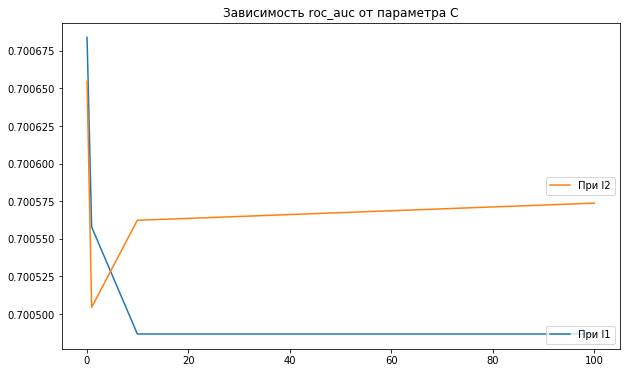

In [306]:
plt.show()